# **Dataset: Olivetti Dataset**


The Olivetti Dataset is a collection of face images captured under various lighting conditions, facial expressions, and facial details.

This dataset is well-suited for my project for several reasons:

   I. Variability:

   The Olivetti Dataset provides a wide range of variations in terms of lighting, expressions, and angles. This variability is crucial for training a robust facial recognition system that can handle real-world scenarios.

   
   II. Dimensionality:

   The dataset consists of high-dimensional facial images, allowing us to work with more complex features and patterns.
   This is particularly important when building advanced machine learning models for facial recognition tasks.

   
   III. Size:

   While the Olivetti Dataset isn't excessively large, it strikes a balance between being manageable for experimentation and providing enough data to train and test our models effectively.
   This is important, especially if computational resources are limited.


   IV. Research Benchmark:
   
   The Olivetti Dataset has been used as a benchmark in various research works related to face recognition and machine learning.
   By using this dataset, I will be able to capture and compare my results to existing literature, enabling me to assess the performance of my models more effectively.



# **Import the necessary libraries**

The below libraries will provide a comprehensive set of tools and functionalities for data manipulation, visualization, mathematical operations, machine learning, image processing, and computer vision tasks

In [ ]:
# Data manipulation and analysis
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt

# Mathematical operations and array manipulation
import numpy as np

# Statistical data visualization
import seaborn as sns

# Machine learning algorithms and tools
import sklearn

# Working with images
from PIL import Image

# Image processing and computer vision
import cv2

# Support Vector Classifier
from sklearn.svm import SVC

# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# XGBoost classifier
import xgboost as xgb

# Multi-Layer Perceptron classifier
from sklearn.neural_network import MLPClassifier

# **Data Exploration**

The Olivetti face dataset is explored by examining the number of images, unique targets, image size, example pixel values, and visualizing both distinct individuals from the dataset and faces of specific subjects using subplots. This analysis aims to gain insights into the dataset's characteristics and variations in facial features.

Load the data

In [ ]:
# Load the face image data from the "olivetti_faces.npy" file
data = np.load("/content/olivetti_faces.npy")

# Load the target labels from the "olivetti_faces_target.npy" file
target = np.load("/content/olivetti_faces_target.npy")

Olivetti Dataset Summary

In [ ]:
# Print the number of images in the dataset
print("There are {} images in the dataset".format(len(data)))

# Print the number of unique targets in the dataset
print("There are {} unique targets in the dataset".format(len(np.unique(target))))

# Print the size of each image in the dataset
print("Size of each image is {}x{}".format(data.shape[1], data.shape[2]))

# Print the unique target numbers in the dataset
print("Unique target number:", np.unique(target))

# Calculate the mean pixel value across all images
mean_pixel_value = np.mean(data)
print("Mean: {:.4f}".format(mean_pixel_value))

# Calculate the standard deviation of pixel values across all images
std_pixel_value = np.std(data)
print("Standard Deviation: {:.4f}".format(std_pixel_value))

# Find the minimum pixel value across all images
min_pixel_value = np.min(data)
print("Minimum Value: {:.4f}".format(min_pixel_value))

# Find the maximum pixel value across all images
max_pixel_value = np.max(data)
print("Maximum Value: {:.4f}".format(max_pixel_value))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Mean: 0.5470
Standard Deviation: 0.1725
Minimum Value: 0.0000
Maximum Value: 1.0000


This mean value suggests that, on average, the pixel intensities in the images are closer to a mid-level gray (50% gray). Values closer to 0 indicate darker regions, while values closer to 1 represent brighter regions in the images.

The standard deviation measures the spread or variation of the pixel values around the mean. A smaller standard deviation indicates that the pixel values are more tightly clustered around the mean, suggesting that the images have consistent pixel intensities.

Visualising Distict Individuals

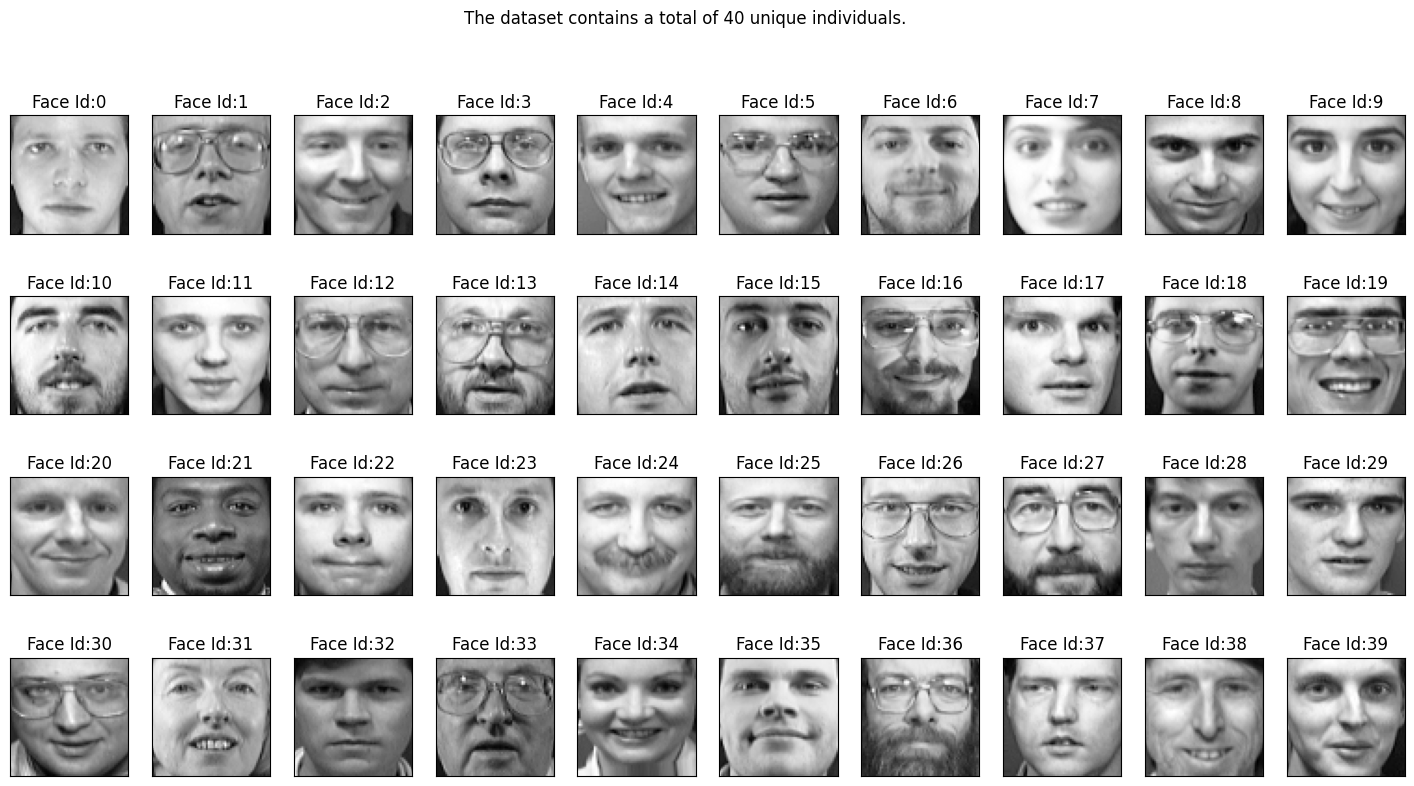

In [ ]:
def display_distinct_people(images, unique_ids):
    # Creating a 4x10 grid of subplots in an 18x9 figure size
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))

    # Iterating over the unique IDs of distinct people and their corresponding index
    for idx, unique_id in enumerate(unique_ids):

        # Calculate the row and column index for the current subplot
        row_idx = idx // 10
        col_idx = idx % 10

        # Calculate the starting index of the images for the current ID
        image_index = unique_id * 10

        # Displaying the image associated with the current ID in the corresponding subplot
        axarr[row_idx, col_idx].imshow(images[image_index], cmap='gray')

        # Removing the x-axis and y-axis tick marks (labels) for better visualization
        axarr[row_idx, col_idx].set_xticks([])
        axarr[row_idx, col_idx].set_yticks([])

        # Setting the title of the subplot to indicate the face ID
        axarr[row_idx, col_idx].set_title("Face Id:{}".format(unique_id))

    # Setting a common title for all subplots to provide information about the dataset
    plt.suptitle("The dataset contains a total of 40 unique individuals.")

# Calling the display_distinct_people function with the dataset's images and unique IDs
display_distinct_people(data, np.unique(target))

Visualizing Faces of Specific IDs

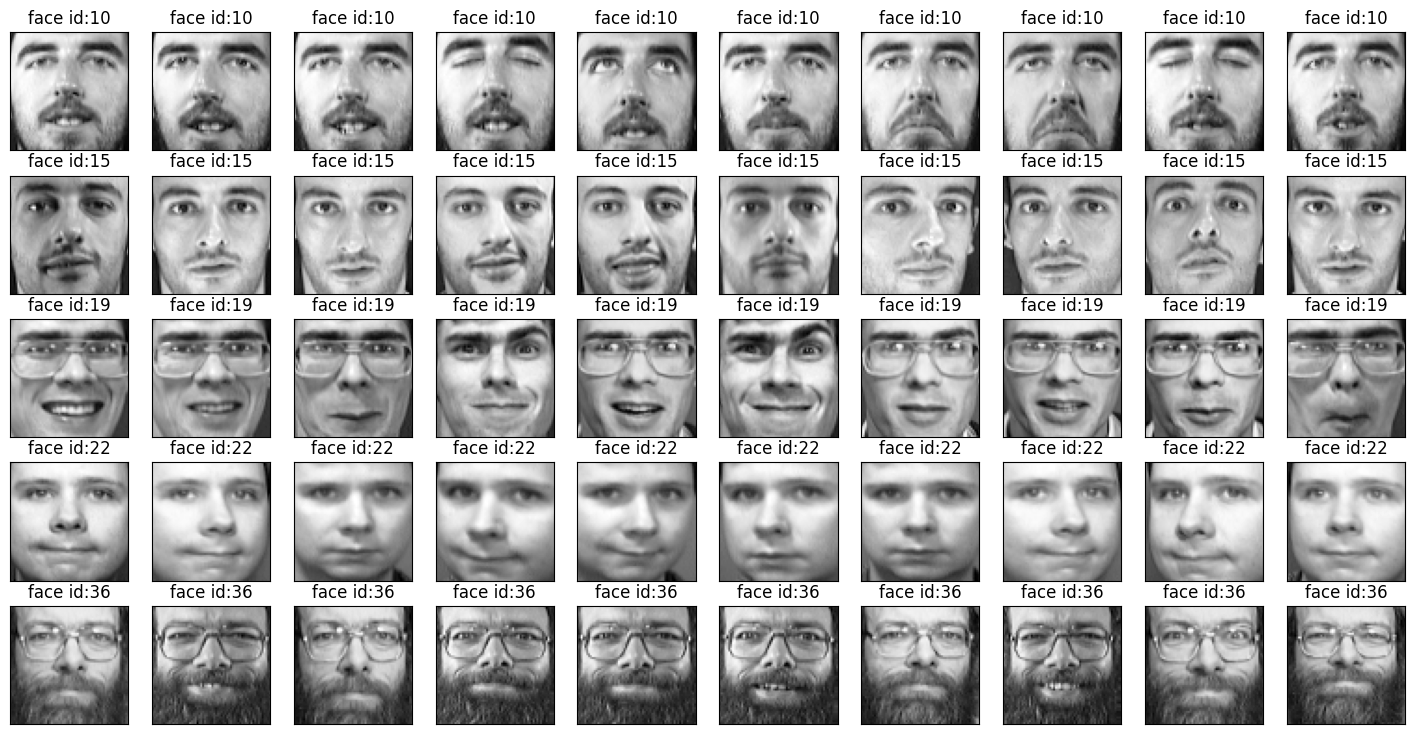

In [ ]:
# Function to show 10 faces of specific subjects
def display_faces_of_subjects(images, subject_ids):
    # Each subject has 10 distinct face images
    cols = 10

    # Calculate the number of rows needed based on the number of subject IDs
    rows = (len(subject_ids) * 10) // cols
    rows = int(rows)

    # Create a grid of subplots with the specified number of rows and columns
    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))

    # Iterate over the subject IDs
    for i, subject_id in enumerate(subject_ids):
        # Iterate over the columns (10 face images per subject)
        for j in range(cols):
            # Calculate the index of the current face image
            image_index = subject_id * 10 + j

            # Display the face image in the current subplot
            axarr[i, j].imshow(images[image_index], cmap="gray")

            # Remove the x-axis tick marks
            axarr[i, j].set_xticks([])

            # Remove the y-axis tick marks
            axarr[i, j].set_yticks([])

            # Set the title of the subplot to the subject's face ID
            axarr[i, j].set_title("face id:{}".format(subject_id))

# Call the function to show 10 faces of subjects with IDs [10, 15, 19, 22, 36]
display_faces_of_subjects(images=data, subject_ids=[10, 15, 19, 22, 36])

# **Data Pre-processing**

The images are transformed for efficient model training, and the dataset is split into training and testing sets. Additionally, the class distribution is visually examined to understand the balance or imbalance within the dataset, providing valuable insights for model performance evaluation.

Reshaping Images for Machine Learning Model

In [ ]:
# Reshape images for machine learning model
num_images, image_height, image_width = data.shape
X = data.reshape((num_images, image_height * image_width))
print("X shape:", X.shape)

X shape: (400, 4096)


Splitting Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, stratify=target, random_state=0)

# Print the shape of the training set
print("X_train shape:", X_train.shape)

# Print the shape of the training labels
print(f"y_train shape: {y_train.shape}")

# Print the shape of the testing set
print("X_test shape:", X_test.shape)

# Print the shape of the testing labels
print(f"y_test shape: {y_test.shape}")

X_train shape: (320, 4096)
y_train shape: (320,)
X_test shape: (80, 4096)
y_test shape: (80,)


Visualize the Distribution of Samples for each class

<ipython-input-8-23488fab07ac>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name, num_colors)


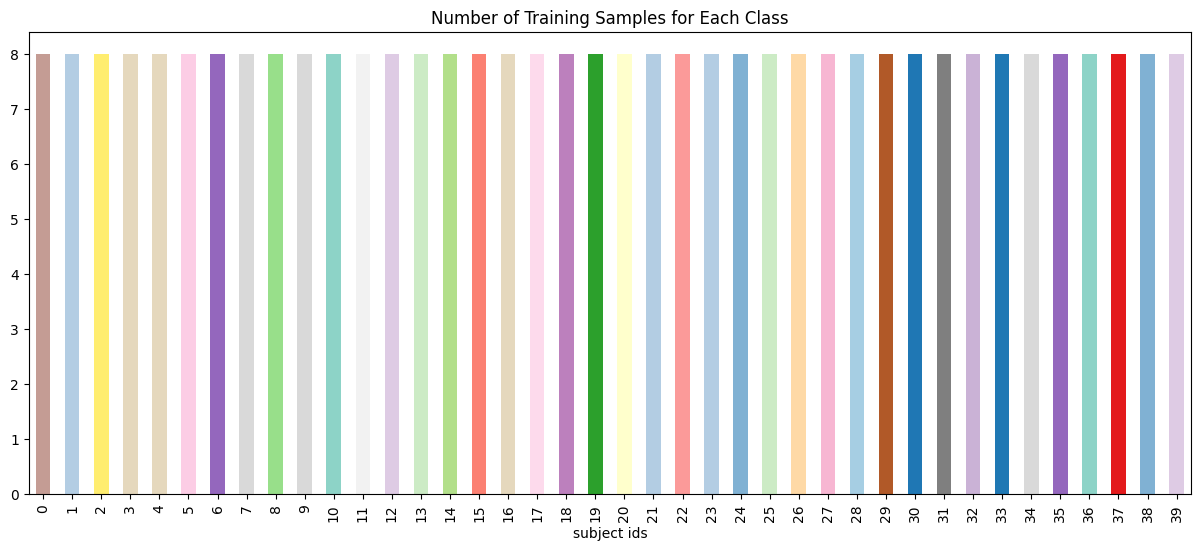

In [ ]:
# Create a DataFrame for the target labels
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train

# Group the DataFrame by subject ids and calculate the size of each group
class_counts = y_frame.groupby(['subject ids']).size()

# Define the number of distinct colors needed
num_colors = 40

# Select 40 distinct colors from different colormaps
colormap_names = ['tab20', 'Set3', 'Pastel1', 'Paired']
colors = []
for cmap_name in colormap_names:
    cmap = plt.cm.get_cmap(cmap_name, num_colors)
    cmap_colors = cmap(np.arange(num_colors))
    colors.extend(cmap_colors)

# Shuffle the colors randomly
np.random.shuffle(colors)

# Plot a bar chart showing the number of samples for each class
class_counts.plot(kind='bar', figsize=(15, 6), title="Number of Training Samples for Each Class", color=colors)

plt.show()

# **Principal Component Analysis(PCA)**

Using the mglearn library, the principal components are explored. PCA is applied to reduce data dimensionality and project it onto the principal components. The significance of PCA components is analyzed through explained variance ratio. A total of 90 components are selected for dimensionality reduction. The average face and all eigenfaces representing the principal components are visualized. PCA transformation is then applied to both training and test data for further analysis.

### Part 1: Understanding the Principal Components

In [ ]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.6 MB/s eta 0:00:00


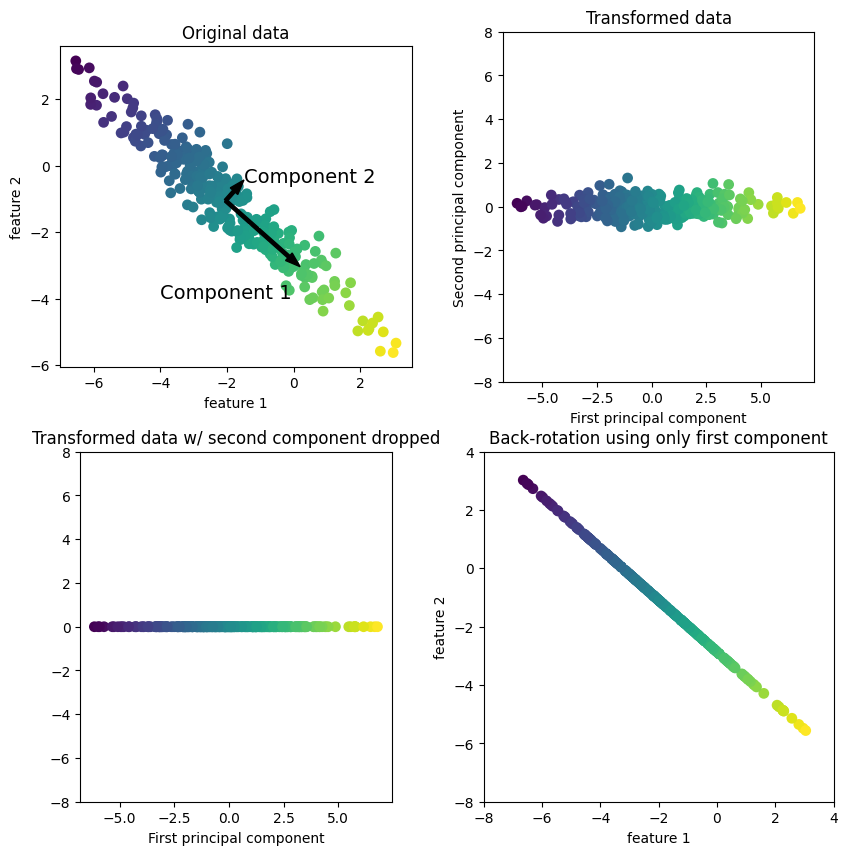

In [ ]:
import mglearn

# Plot an illustration of PCA (Principal Component Analysis)
mglearn.plots.plot_pca_illustration()

The example uses a fabricated 2D dataset with color-coded data points representing different properties.
The first step is determining the direction of maximum variance in the data, called Component 1. This highlights where a large concentration of correlated data exists.
Next, the algorithm orients itself orthogonally (at a 90 degree angle) to Component 1 to find the direction with the most variance perpendicular to the first.
In 2D there is only one orthogonal orientation, but in high dimensional data there are near infinite potential orthogonal directions.
By iteratively finding the directions of maximum variance and orienting orthogonally, the algorithm can reveal the underlying correlated structures in multidimensional data.
This process of sequentially maximizing variance in orthogonal directions is the essence of how principal component analysis works to reduce dimensionality and identify patterns.

### Part 2: Reducing Dimentionality with PCA (number of components = 2)

In [ ]:
# Importing the PCA class from the scikit-learn library
from sklearn.decomposition import PCA

# Creating an instance of the PCA class with 2 components
pca = PCA(n_components=2)

# Fitting the PCA model to the input data X
# This step computes the principal components based on the data
pca.fit(X)

# Applying the learned PCA transformation to the input data X
# This step reduces the dimensionality of X to 2 dimensions
X_pca = pca.transform(X)

# The resulting transformed data is stored in X_pca

PCA Projection

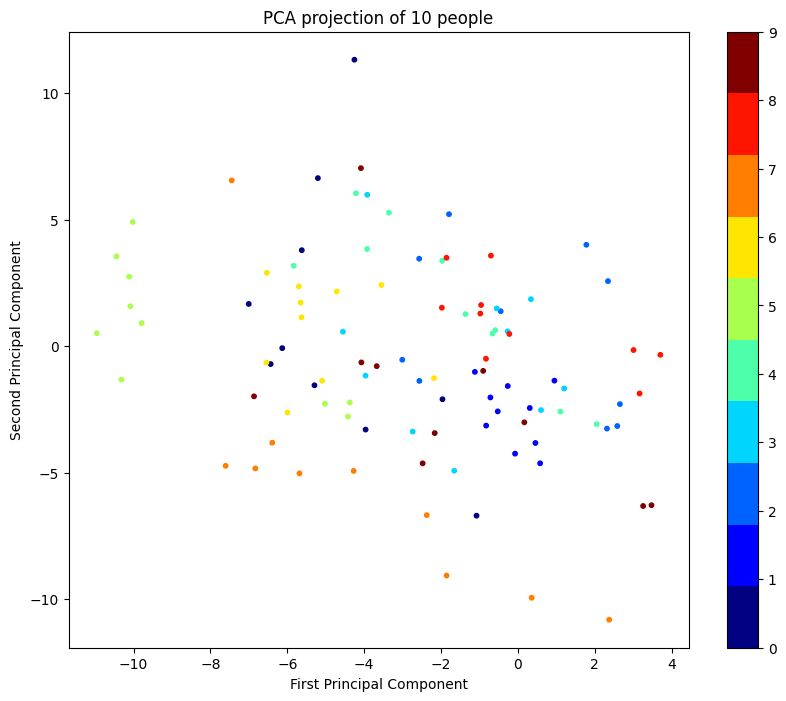

In [ ]:
number_of_people = 10

# Setting the index range based on the number of people
index_range = number_of_people * 10

# Creating a scatter plot using the PCA-transformed data
# The x-coordinates are taken from the first principal component of X_pca
# The y-coordinates are taken from the second principal component of X_pca
# The color of each point is determined by the target values
# The marker size is set to 10
# The colormap 'jet' is used, with a range based on the number of people
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:index_range, 0],
                      X_pca[:index_range, 1],
                      c=target[:index_range],
                      s=10,
                      cmap=plt.get_cmap('jet', number_of_people))

# Setting the x-label of the plot
plt.xlabel("First Principal Component")

# Setting the y-label of the plot
plt.ylabel("Second Principal Component")

# Setting the title of the plot with the number of people
plt.title("PCA projection of {} people".format(number_of_people))

# Adding a colorbar to the plot to show the color mapping
plt.colorbar(scatter)

# Show the plot
plt.show()


There is no clear separation or clustering of the data points by person, as different colors are mixed together on the plot. This means that the first two principal components are not enough to distinguish between different people, and more principal components are needed to capture the individual features of each person.

### Part 3: Reducing Dimentionality with PCA (number of components = 90)

Explained Variance Ratio of PCA Components

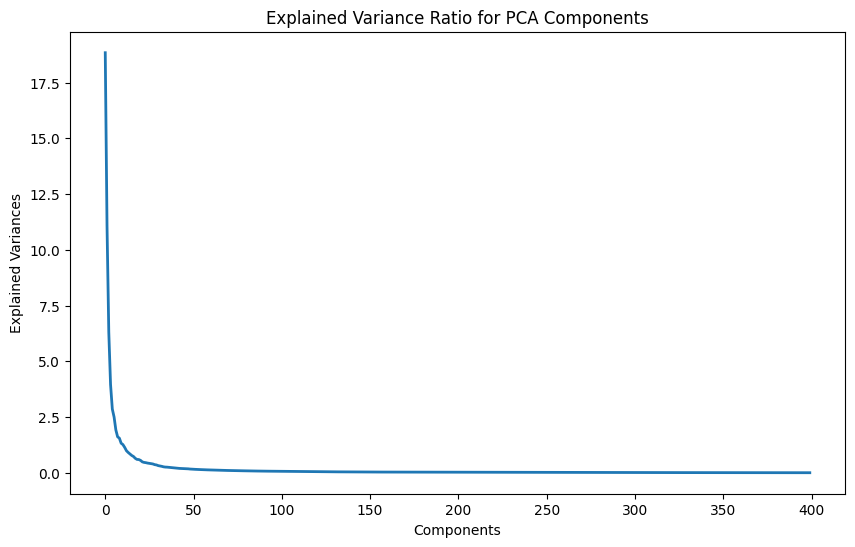

In [ ]:
# Creating an instance of PCA without specifying the number of components
pca = PCA()

# Fitting the PCA model to the data X
pca.fit(X)

# Plotting the explained variance ratio for each component
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_, linewidth=2)

# Adding labels for the x-axis and y-axis
plt.xlabel('Components')
plt.ylabel('Explained Variances')

# Adding a title to the plot
plt.title('Explained Variance Ratio for PCA Components')

# Displaying the plot
plt.show()

It becomes evident that using 90 or more PCA components doesn't significantly alter the representation of the data. Despite having a higher number of components, the essence of the data seems to remain unchanged. Now, we'll proceed with the classification process using these 90 PCA components.

In [ ]:
n_components = 90  # Specify the number of components to keep after PCA

# Create an instance of the PCA class with specified parameters
pca = PCA(n_components=n_components, whiten=True)

# Fit the PCA model to the training data
pca.fit(X_train)

PCA(n_components=90, whiten=True)

cumulative explained variance

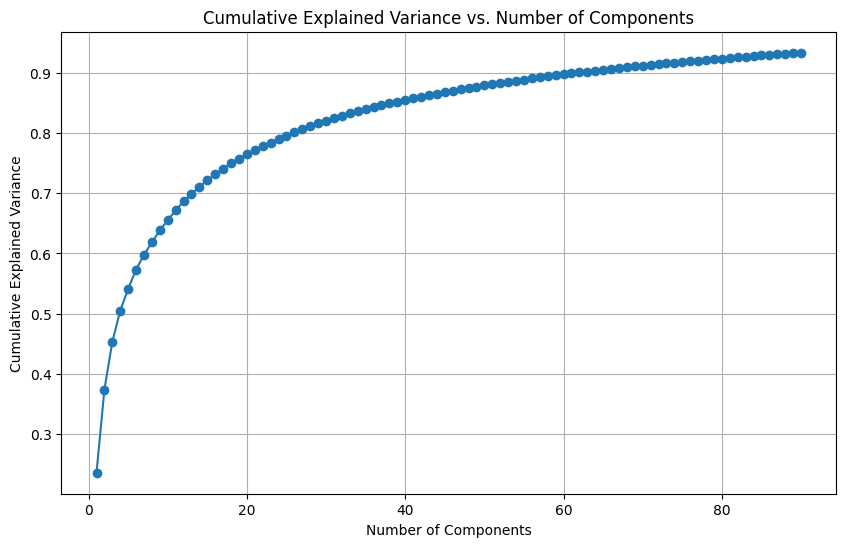

In [ ]:
# Calculate the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_components + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

As illustrated in Figure , when the number of components is set to 90, the variance value surpasses 90%, effectively encompassing the fundamental features of the data. In the context of dimensionality reduction using PCA, the aim is to emphasize one or more of the primary principal components, thereby projecting the data into lower dimensions while retaining the utmost data variance.
If more components are added beyond this point, the increase in performance becomes relatively marginal.

Displaying the Average Face using Image Plot

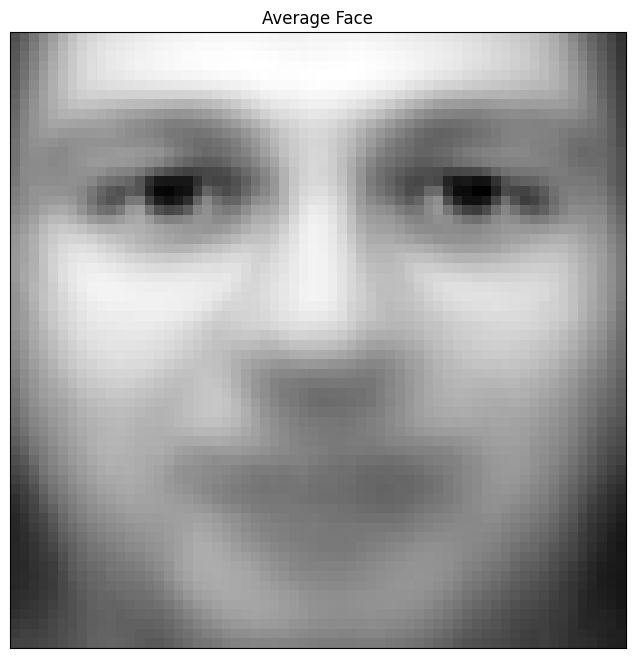

In [ ]:
# Create a figure and axis objects with specified figsize
plt.figure(figsize=(8, 8))

# Display the average face using an image plot
plt.imshow(pca.mean_.reshape((64, 64)), cmap="gray")

# Remove the tick marks on the x and y axes
plt.xticks([])
plt.yticks([])

# Set the title of the plot
plt.title('Average Face')

# Display the plot
plt.show()


Displaying All Eigen Faces

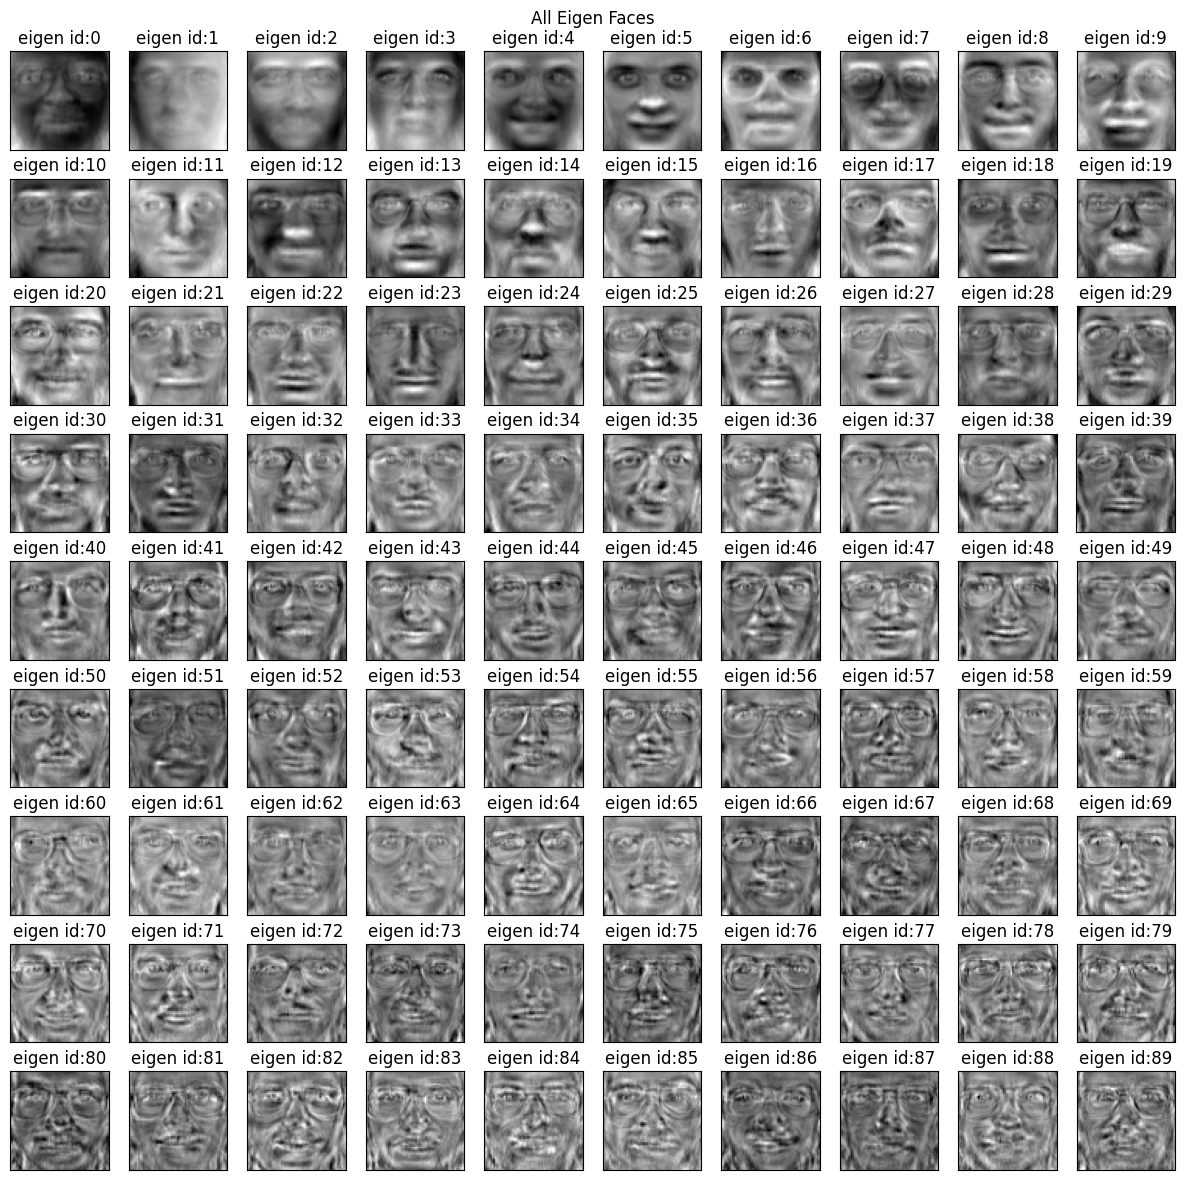

In [ ]:
# Calculate the number of eigenfaces
number_of_eigenfaces = len(pca.components_)

# Reshape the eigenfaces to match the dimensions of the original data
eigen_faces = pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

# Set the number of columns and calculate the number of rows for subplots
cols = 10
rows = (number_of_eigenfaces + cols - 1) // cols

# Create a figure and an array of subplots with a larger figsize
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(12,12))
axarr = axarr.flatten()

# Iterate over each eigenface and display it in the current subplot
for i, ax in enumerate(axarr):
    if i < number_of_eigenfaces:
        ax.imshow(eigen_faces[i], cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("eigen id:{}".format(i))
    else:
        # Remove empty subplots if there are more eigenfaces than subplots
        ax.axis('off')

# Set the overall title for the plot
plt.suptitle("All Eigen Faces")

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Display the plot
plt.show()

### **Part 4: PCA Transformation on Train and Test data**

In [ ]:
# Apply PCA transformation to the training data
X_train_pca = pca.transform(X_train)

# Apply PCA transformation to the test data
X_test_pca = pca.transform(X_test)

# **Model**

The PCA-transformed training data is used as input for multiple machine learning models, including Linear Discriminant Analysis, Logistic Regression, Gaussian Naive Bayes, K-Nearest Neighbors, Decision Tree, Support Vector Machine, Random Forest, Gradient Boosting, AdaBoost, XGBoost, and Multi-Layer Perceptron. Each model is fitted to the training data to learn the underlying patterns and relationships present in the olivetti dataset.

In [ ]:
from sklearn import metrics
import time
from tabulate import tabulate

# Define a list to store different models
models = []

# Append Linear Discriminant Analysis model to the list
models.append(('LDA', LinearDiscriminantAnalysis()))

# Append Logistic Regression model to the list
models.append(("LR", LogisticRegression()))

# Append Gaussian Naive Bayes model to the list
models.append(("NB", GaussianNB()))

# Append K-Nearest Neighbors model to the list
models.append(("KNN", KNeighborsClassifier(n_neighbors=5)))

# Append Decision Tree model to the list
models.append(("DT", DecisionTreeClassifier()))

# Append Support Vector Machine model to the list
models.append(("SVM", SVC()))

# Append Random Forest model to the list
models.append(("RF", RandomForestClassifier()))

# Append Gradient Boosting model to the list
models.append(("GB", GradientBoostingClassifier()))

# Append AdaBoost model to the list
models.append(("AdaBoost", AdaBoostClassifier()))

# Append XGBoost model to the list
models.append(("XGBoost", xgb.XGBClassifier()))

# Create an instance of MLPClassifier and append it to the list
mlp = MLPClassifier(max_iter=500)
models.append(("MLP", mlp))

results = []
headers = ["Model", "Accuracy", "Training Time", "Prediction Time"]

# Iterate over each model in the list
for name, model in models:
    clf = model

    start_time = time.time()
    clf.fit(X_train_pca, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = clf.predict(X_test_pca)
    prediction_time = time.time() - start_time

    accuracy = metrics.accuracy_score(y_test, y_pred)
    results.append([name, accuracy, training_time, prediction_time])

print("Model Performance Analysis: Accuracy and Efficiency")

# Print the results in a tabular format
print(tabulate(results, headers=headers, tablefmt="grid"))

Model Performance Analysis: Accuracy and Efficiency
+----------+------------+-----------------+-------------------+
| Model    |   Accuracy |   Training Time |   Prediction Time |
+==========+============+=================+===================+
| LDA      |     0.9625 |      0.041096   |       0.00117111  |
+----------+------------+-----------------+-------------------+
| LR       |     0.9375 |      0.224043   |       0.00408435  |
+----------+------------+-----------------+-------------------+
| NB       |     0.9375 |      0.0143778  |       0.0257061   |
+----------+------------+-----------------+-------------------+
| KNN      |     0.775  |      0.00190878 |       0.0784731   |
+----------+------------+-----------------+-------------------+
| DT       |     0.625  |      0.0614402  |       0.000341892 |
+----------+------------+-----------------+-------------------+
| SVM      |     0.9375 |      0.0486603  |       0.00808215  |
+----------+------------+-----------------+---------

Linear Discriminant Analysis (LDA): Achieves the highest accuracy of 0.9625, effectively distinguishing between classes.

Support Vector Machine (SVM): Comes in second with an accuracy of 0.9375, showing strong classification performance.


Logistic Regression (LR): Holds third place with an accuracy of 0.925, providing reliable binary classification.


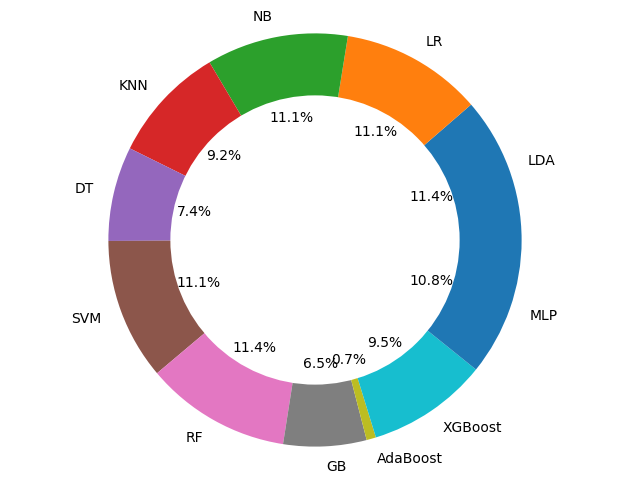

In [ ]:
# Extract model and accuracy data
models = [res[0] for res in results]
accuracy = [res[1] for res in results]

# Create pie chart
plt.pie(accuracy, labels=models, autopct='%.1f%%')

# Draw circle
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so pie is drawn as a circle
plt.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Define a list to store the classification report data
classification_reports = []

# Iterate over each model in the list
for name, model in models:
    clf = model

    start_time = time.time()
    clf.fit(X_train_pca, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = clf.predict(X_test_pca)
    prediction_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate classification report
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)  # Set zero_division parameter

    # Append relevant values to the classification_reports list
    classification_reports.append([
        name,
        round(report['macro avg']['precision'], 4),
        round(report['macro avg']['recall'], 4),
        round(report['macro avg']['f1-score'], 4),
        round(accuracy, 4)
    ])

# Print the classification report table in the desired format
print("Model Evaluation and Performance Metrics")
report_headers = ["Algorithm", "Precision (Avg)", "Recall (Avg)", "F1-Score (Avg)", "Accuracy (Overall)"]
print(tabulate(classification_reports, headers=report_headers, tablefmt="grid"))

Model Evaluation and Performance Metrics
+-------------+-------------------+----------------+------------------+----------------------+
| Algorithm   |   Precision (Avg) |   Recall (Avg) |   F1-Score (Avg) |   Accuracy (Overall) |
+=============+===================+================+==================+======================+
| LDA         |            0.975  |         0.9625 |           0.96   |               0.9625 |
+-------------+-------------------+----------------+------------------+----------------------+
| LR          |            0.9667 |         0.9375 |           0.9367 |               0.9375 |
+-------------+-------------------+----------------+------------------+----------------------+
| NB          |            0.9625 |         0.9375 |           0.935  |               0.9375 |
+-------------+-------------------+----------------+------------------+----------------------+
| KNN         |            0.8667 |         0.775  |           0.7592 |               0.775  |
+--------

LDA (Linear Discriminant Analysis): LDA shows high precision, recall, and F1-score, indicating good overall performance. Accuracy is also high, suggesting that the model performs well on this dataset.

LR (Logistic Regression): LR also performs well with respectable precision, recall, and F1-score. The accuracy is high, showcasing the model's capability to predict accurately.

In summary, LDA, LR, NB, SVM, and RF seem to be the strongest performers based on their precision, recall, F1-score, and accuracy. On the other hand, DT, GB, AdaBoost, and KNN show some weaknesses in terms of their performance metrics.

# **Cross Validations**

This analysis involves performing cross-validation to evaluate the models using PCA-transformed data. Mean cross-validation scores are calculated and plotted for performance assessment. Model performance is compared based on accuracy scores obtained through cross-validation, and results are presented in a tabular format to aid in final model selection.

Performing cross-validation on models with PCA-transformed data

K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

results = []
labels = []

# Iterate over each model in the list
for name, model in models:
    # Create a K-Fold cross-validator
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)

    # Perform cross-validation and calculate mean score
    cv_scores = cross_val_score(model, X_train_pca, y_train, cv=kfold)
    mean_score = cv_scores.mean()

    # Store the results and labels
    results.append(mean_score)
    labels.append(name)

    # Print the mean cross-validation score for the model
    print("{} mean cross-validation score: {:.2f}".format(name, mean_score))

LDA mean cross-validation score: 0.97
LR mean cross-validation score: 0.91
NB mean cross-validation score: 0.65
KNN mean cross-validation score: 0.59
DT mean cross-validation score: 0.42
SVM mean cross-validation score: 0.79
RF mean cross-validation score: 0.85
GB mean cross-validation score: 0.39
AdaBoost mean cross-validation score: 0.02
XGBoost mean cross-validation score: 0.66
MLP mean cross-validation score: 0.76


plotting mean cross-validation scores

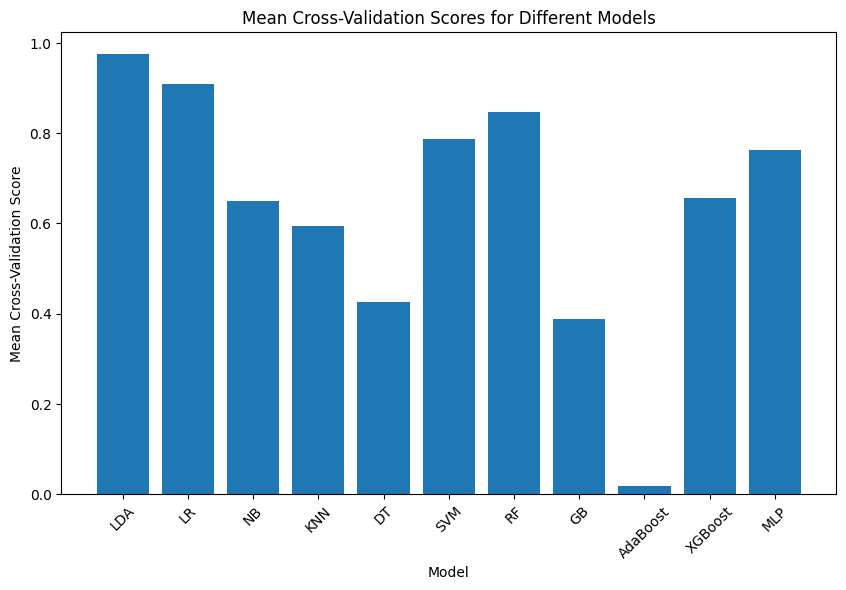

In [ ]:
# Plot the mean cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(labels, results)
plt.xlabel("Model")
plt.ylabel("Mean Cross-Validation Score")
plt.title("Mean Cross-Validation Scores for Different Models")
plt.xticks(rotation=45)
plt.show()

LDA (Linear Discriminant Analysis): Shows the highest mean cross-validation score of 0.97, indicating strong performance and good generalization ability.

LR (Logistic Regression): Demonstrates a solid mean cross-validation score of 0.91, reflecting consistent performance in making predictions.

Listing the top 2 models and accuracies

In [ ]:
# Sort the results and labels based on accuracy in descending order
sorted_results_labels = sorted(zip(results, labels), reverse=True)

# Select the top 2 models and their accuracies
top_2_models = sorted_results_labels[:2]

# Print the top 2 models and their accuracies
print("Top 2 Models and their Accuracies:")
for score, model_name in top_2_models:
    print("{}: {:.2f}".format(model_name, score))

Top 2 Models and their Accuracies:
LDA: 0.97
LR: 0.91


# **Model 1: Logistic Regression**


This analysis demonstrates a generic image classification workflow using Logistic Regression with hyperparameter tuning and PCA transformation. It first trains a Logistic Regression classifier with default hyperparameters on the PCA transformed training data. Then, it evaluates the model's accuracy and visualizes the confusion matrix. Next, it performs hyperparameter tuning using GridSearchCV to find the best combination of regularization, inverse regularization strength, and optimization solver. After identifying the best hyperparameters, it retrains the Logistic Regression classifier with these settings. Finally, it displays a selection of test images with their predicted and true labels to assess the model's performance.

Logistic Regression Classifier for PCA Transformed Data

In [ ]:
# Create an instance of Logistic Regression classifier
log_reg_classifier = LogisticRegression()

# Train the classifier on the PCA transformed training data
log_reg_classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA transformed test data
y_pred = log_reg_classifier.predict(X_test_pca)

# Calculate and print the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(accuracy))

Accuracy score: 0.94


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1 0 0 ... 0 0 1]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


Confusion Matrix Heatmap

<Axes: title={'center': 'LR: Confusion Matrix Heatmap'}>

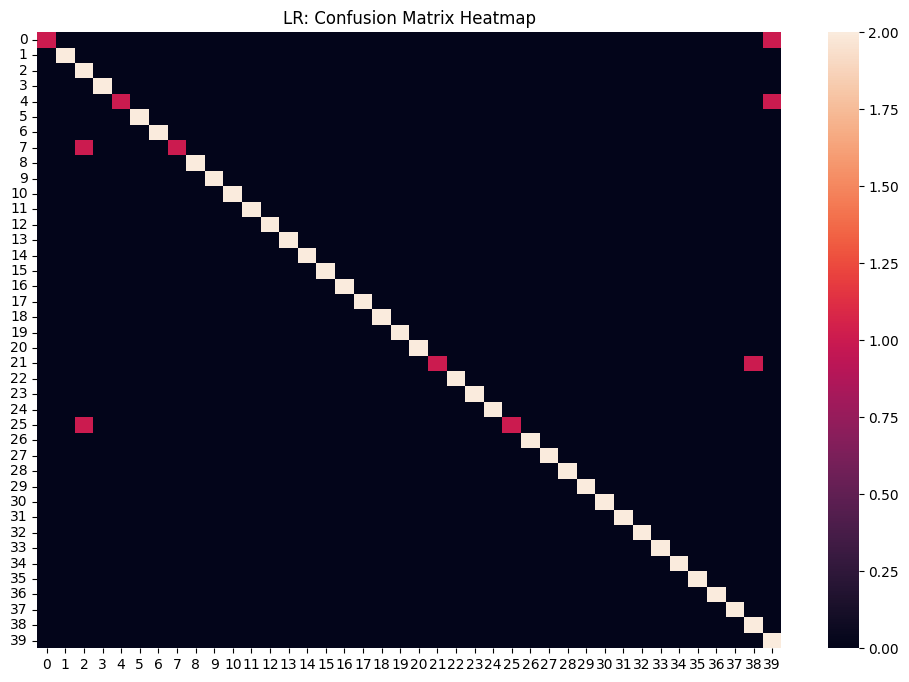

In [ ]:
import seaborn as sns

# Create a figure with a specified figure number and size
plt.figure(1, figsize=(12, 8))

# Set the title for the heatmap
plt.title('LR: Confusion Matrix Heatmap')

# Create a heatmap using seaborn
# Input: Confusion matrix computed using y_test and y_pred
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

Classification Report

In [ ]:
# Print the classification report to evaluate the model's performance and metrics for each class.
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

In [ ]:
from sklearn.metrics import classification_report

# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Extract the average metrics
average_metrics = report_dict['macro avg']

# Prepare the average metrics data for tabulation
average_metrics_data = [[
    round(average_metrics['precision'], 4),
    round(average_metrics['recall'], 4),
    round(average_metrics['f1-score'], 4),
    average_metrics['support']
]]

# Define the headers for the table
table_headers = ['Precision', 'Recall', 'F1-Score', 'Support']

# Print the average metrics table using tabulate
print("Average Metrics:")
print(tabulate(average_metrics_data, headers=table_headers, tablefmt="grid"))

Average Metrics:
+-------------+----------+------------+-----------+
|   Precision |   Recall |   F1-Score |   Support |
+=============+==========+============+===========+
|      0.9667 |   0.9375 |     0.9367 |        80 |
+-------------+----------+------------+-----------+


Hyper-parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an instance of Logistic Regression classifier
log_reg_classifier = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l2'],                    # Regularization type ('l2' for Ridge)
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],   # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'],     # Optimization solver for logistic regression
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(log_reg_classifier, param_grid, cv=5, n_jobs=-1)

# Train the GridSearchCV on the PCA transformed training data
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Get the best model from the search
best_model = grid_search.best_estimator_

# Make predictions on the PCA transformed test data using the best model
y_pred = best_model.predict(X_test_pca)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Prepare the data for the table
table_data = [
    ["Best Penalty", best_params['penalty']],
    ["Best C", best_params['C']],
    ["Best Solver", best_params['solver']],
    ["Accuracy", accuracy]
]

# Set the title for the table
table_title = "LR: Hyperparameter Tuning Results"

# Print the table using tabulate
print(table_title)
print(tabulate(table_data, headers=["Hyperparameter", "Value"], tablefmt="grid"))

LR: Hyperparameter Tuning Results
+------------------+-----------+
| Hyperparameter   | Value     |
+==================+===========+
| Best Penalty     | l2        |
+------------------+-----------+
| Best C           | 0.1       |
+------------------+-----------+
| Best Solver      | liblinear |
+------------------+-----------+
| Accuracy         | 0.925     |
+------------------+-----------+


Logistic Regression Classifier with Best Hyperparameters

In [ ]:
# Create an instance of Logistic Regression classifier with best hyperparameters
best_log_reg_classifier = LogisticRegression(C=0.01, penalty='l2', solver='liblinear')

# Train the classifier on the PCA transformed training data
best_log_reg_classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA transformed test data
y_pred = best_log_reg_classifier.predict(X_test_pca)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score with best model: {:.2f}".format(accuracy))


Accuracy score with best model: 0.93


Visualizing Test Images with Predicted and True Labels

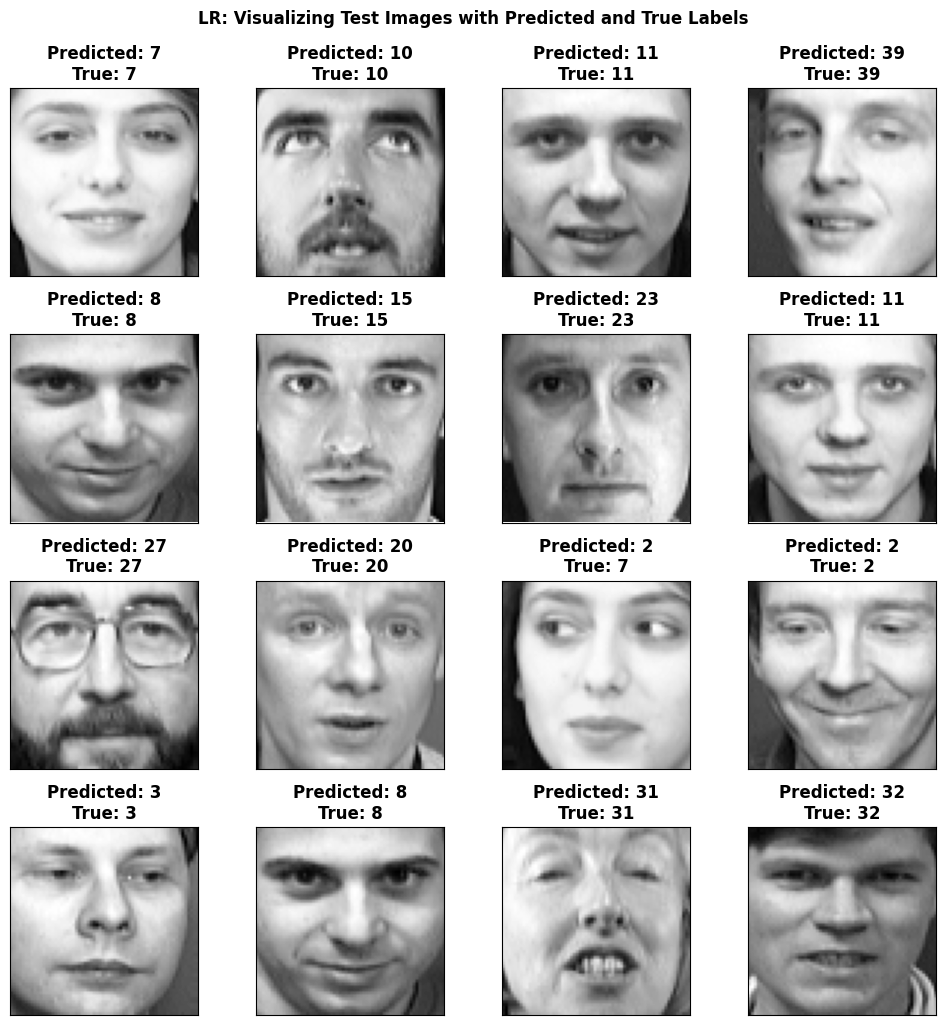

In [ ]:
# Load the test images and labels
test_images = X_test.reshape((-1, data.shape[1], data.shape[2]))
predicted_labels = y_pred
true_labels = y_test

# Create a figure with a specified number of rows and columns
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Iterate over each subplot
for i, ax in enumerate(axes.flatten()):
    # Display the test image in grayscale
    ax.imshow(test_images[i], cmap='gray')

    # Remove tick marks on x and y axes
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the title to display predicted and true labels
    ax.set_title(f'Predicted: {predicted_labels[i]}\nTrue: {true_labels[i]}', fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Set the title for the overall visualization
plt.suptitle("LR: Visualizing Test Images with Predicted and True Labels", y=1.02, fontsize=12, fontweight='bold')

# Display the plot
plt.show()


# **Model 2: Linear Discriminant Analysis**


This analysis demonstrates a generic image classification workflow using Linear Discriminant Analysis (LDA) with hyperparameter tuning and PCA transformation. It first trains an LDA classifier with default hyperparameters on the PCA transformed training data. Then, it evaluates the model's accuracy and visualizes the confusion matrix. Next, it performs hyperparameter tuning using GridSearchCV to find the best combination of regularization and optimization solver for LDA. After identifying the best hyperparameters, it retrains the LDA classifier with these settings. Finally, it displays a selection of test images with their predicted and true labels to assess the model's performance.

Linear Discriminant Analysis Classifier for PCA Transformed Data

In [ ]:
# Create an instance of Linear Discriminant Analysis classifier
lda_classifier = LinearDiscriminantAnalysis()

# Train the classifier on the PCA transformed training data
lda_classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA transformed test data
y_pred = lda_classifier.predict(X_test_pca)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(accuracy))

Accuracy score: 0.96


Confusion Matrix

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 2]])

Confusion Matrix Heatmap

<Axes: title={'center': 'LDA: Confusion Matrix Heatmap'}>

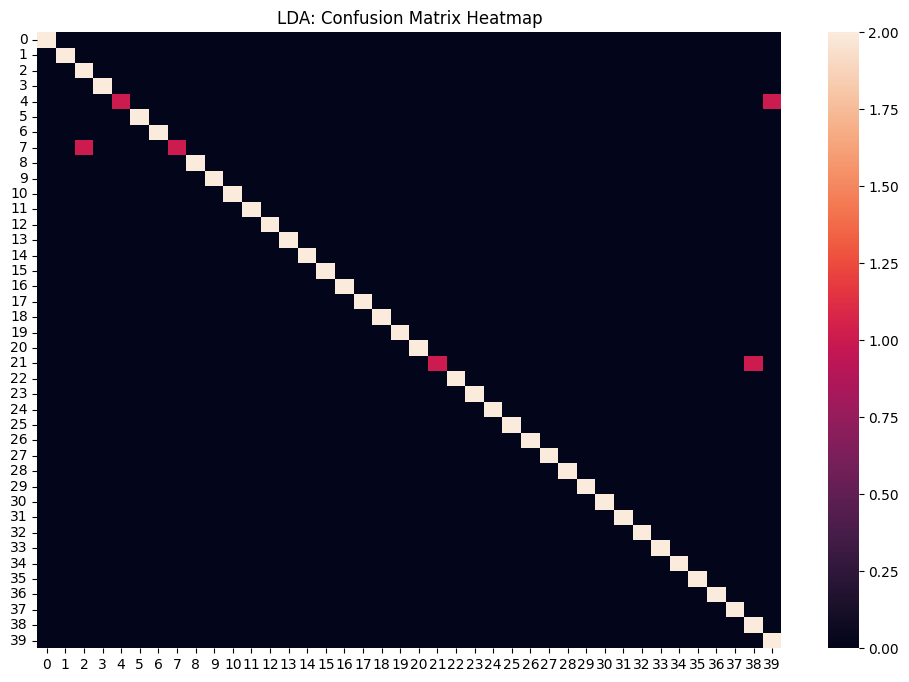

In [ ]:
# Create a figure with a specified figure number and size
plt.figure(1, figsize=(12, 8))

# Set the title for the heatmap
plt.title('LDA: Confusion Matrix Heatmap')

# Create a heatmap using seaborn
# Input: Confusion matrix computed using y_test and y_pred
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

Classification Report

In [ ]:
# Print the classification report to evaluate the model's performance and metrics for each class.
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

In [ ]:
from sklearn.metrics import classification_report

# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Extract the average metrics
average_metrics = report_dict['macro avg']

# Prepare the average metrics data for tabulation
average_metrics_data = [[
    round(average_metrics['precision'], 4),
    round(average_metrics['recall'], 4),
    round(average_metrics['f1-score'], 4),
    average_metrics['support']
]]

# Define the headers for the table
table_headers = ['Precision', 'Recall', 'F1-Score', 'Support']

# Print the average metrics table using tabulate
print("Average Metrics:")
print(tabulate(average_metrics_data, headers=table_headers, tablefmt="grid"))


Average Metrics:
+-------------+----------+------------+-----------+
|   Precision |   Recall |   F1-Score |   Support |
+=============+==========+============+===========+
|       0.975 |   0.9625 |       0.96 |        80 |
+-------------+----------+------------+-----------+


Hyper-parameter tuning

In [ ]:
# Create an instance of Linear Discriminant Analysis classifier
lda_classifier = LinearDiscriminantAnalysis()

# Define the hyperparameter grid to search
param_grid = {
    'solver': ['lsqr'],                   # Use the 'lsqr' solver for LDA
    'shrinkage': [None, 'auto', 0.1, 0.5], # Shrinkage parameter for regularization
    'n_components': [None, 5, 10, 20]      # Number of components to keep after LDA
}

# Create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(lda_classifier, param_grid, cv=5, n_jobs=-1)

# Train the GridSearchCV on the PCA transformed training data
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_

# Get the best model from the search
best_model = grid_search.best_estimator_

# Make predictions on the PCA transformed test data using the best model
y_pred = best_model.predict(X_test_pca)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Prepare the data for the table
table_data = [
    ["Best Solver", best_params['solver']],
    ["Best Shrinkage", str(best_params['shrinkage']) if best_params['shrinkage'] is not None else "None"],
    ["Best n_components", str(best_params['n_components']) if best_params['n_components'] is not None else "None"],
    ["Accuracy", accuracy]
]

# Set the title for the table
table_title = "LDA: Hyperparameter Tuning Results"

print(table_title)

# Print the table using tabulate
print(tabulate(table_data, headers=["Hyperparameter", "Value"], tablefmt="grid"))


LDA: Hyperparameter Tuning Results
+-------------------+---------+
| Hyperparameter    | Value   |
+===================+=========+
| Best Solver       | lsqr    |
+-------------------+---------+
| Best Shrinkage    | None    |
+-------------------+---------+
| Best n_components | None    |
+-------------------+---------+
| Accuracy          | 0.9625  |
+-------------------+---------+


Linear Discriminant Analysis Classifier with Best Hyperparameters

In [ ]:
# Create an instance of Linear Discriminant Analysis classifier with best hyperparameters
best_lda_classifier = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None)

# Train the classifier on the PCA transformed training data
best_lda_classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA transformed test data
y_pred = best_lda_classifier.predict(X_test_pca)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score with best model: {:.2f}".format(accuracy))


Accuracy score with best model: 0.96


Visualizing Test Images with Predicted and True Labels

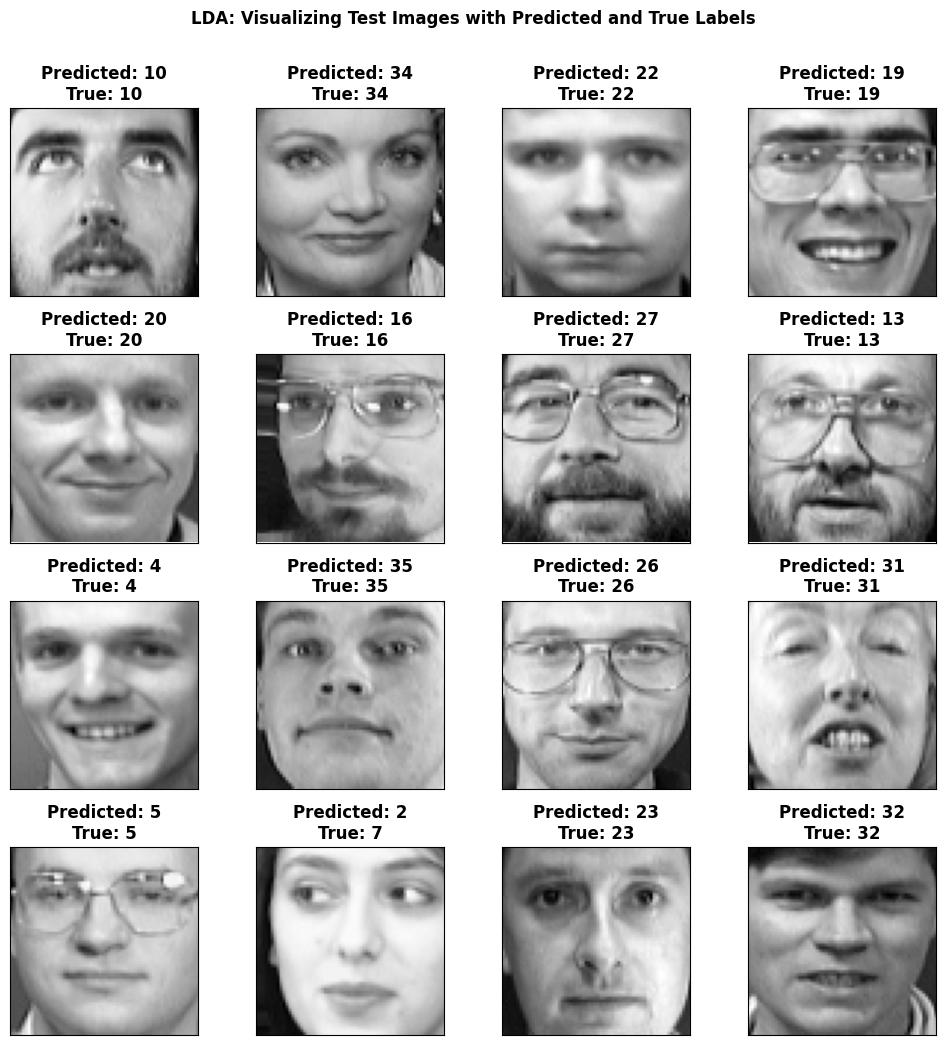

In [ ]:
# Shuffle the indices of the test images randomly
num_images_to_visualize = 16  # You can adjust the number of images to visualize
shuffled_indices = np.random.choice(len(test_images), num_images_to_visualize, replace=False)

# Select the images and labels based on the shuffled indices
selected_test_images = test_images[shuffled_indices]
selected_predicted_labels = predicted_labels[shuffled_indices]
selected_true_labels = true_labels[shuffled_indices]

# Visualize the selected test images with predicted and true labels
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(selected_test_images[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Predicted: {selected_predicted_labels[i]}\nTrue: {selected_true_labels[i]}', fontweight='bold')
plt.tight_layout()

# Set the title for the overall visualization
plt.suptitle("LDA: Visualizing Test Images with Predicted and True Labels", y=1.04, fontsize=12, fontweight='bold')

plt.show()


# Precision-Recall-ROC Curves

The Olivetti Faces dataset is commonly used for face recognition tasks, with 40 individuals each having 10 images under different conditions. When working with this dataset for binary classification (e.g., recognizing a person's face), a precision-recall curve can be useful for the following reasons:

1. Imbalanced Dataset: Accuracy might be misleading in such cases. Precision-recall curves handle imbalanced datasets and provide more informative evaluations.

2. Decision Threshold Analysis: Precision-recall curves help visualize how different decision thresholds impact precision and recall, allowing us to choose a threshold that aligns with our application's requirements.

3. Model Selection and Tuning: Comparing precision-recall curves helps select the best model or hyperparameters.

4. Error Analysis: Analyzing the curve identifies model strengths and weaknesses, aiding improvements and identifying failure cases.

One-Hot Encoding for Multiclass Classification

In [ ]:
# Perform one-hot encoding of the target labels
# Using NumPy's eye function to create a one-hot encoded array
Target = np.eye(40)[target.reshape(-1)]

# Print the shape and the first row of the one-hot encoded target array
print("Target shape:", Target.shape)
print("First row of Target:\n", Target[0])

# Determine the number of classes
n_classes = Target.shape[1]
print("Number of Classes:", n_classes)

Target shape: (400, 40)
First row of Target:
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of Classes: 40


**Splitting Data for Multiclass Classification**

In [ ]:
# Split the data into training and testing sets for the multiclass problem
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, Target, test_size=0.3, stratify=Target, random_state=0)

# Print the shapes of the training and testing sets
print("X_train_multiclass shape:", X_train_mc.shape)
print("X_test_multiclass shape:", X_test_mc.shape)
print("y_train_multiclass shape:", y_train_mc.shape)
print("y_test_multiclass shape:", y_test_mc.shape)

X_train_multiclass shape: (280, 4096)
X_test_multiclass shape: (120, 4096)
y_train_multiclass shape: (280, 40)
y_test_multiclass shape: (120, 40)


Applying PCA to Multiclass Data

In [ ]:
# Create an instance of PCA with specified parameters for multiclass data
pca_mc = PCA(n_components=n_components, whiten=True)

# Fit the PCA model to the multiclass training data
pca_mc.fit(X_train_mc)

# Apply PCA transformation to the multiclass training data
X_train_mc_pca = pca_mc.transform(X_train_mc)

# Apply PCA transformation to the multiclass testing data
X_test_mc_pca = pca_mc.transform(X_test_mc)

# Print the shapes of the PCA transformed datasets
print("X_train_multiclass_pca shape:", X_train_mc_pca.shape)
print("X_test_multiclass_pca shape:", X_test_mc_pca.shape)

X_train_multiclass_pca shape: (280, 90)
X_test_multiclass_pca shape: (120, 90)


Multiclass Classification using One-Vs-Rest Classifier and Logistic Regression

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

# Create an instance of Logistic Regression classifier
lr_classifier = LogisticRegression()

# Create an instance of OneVsRestClassifier with the Logistic Regression classifier
oneRestClassifier = OneVsRestClassifier(lr_classifier)

# Fit the OneVsRestClassifier on the PCA transformed multiclass training data
oneRestClassifier.fit(X_train_mc_pca, y_train_mc)

# Obtain the decision scores on the PCA transformed multiclass testing data
y_score = oneRestClassifier.decision_function(X_test_mc_pca)

from sklearn.metrics import precision_recall_curve, average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_mc[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_mc[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_mc.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_mc, y_score, average="micro")

print('Average precision score, micro-averaged over all classes: {:.2f}'.format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.97


The precision-recall curve helps us visualize the trade-off between precision and recall, while the average precision score gives us a single number to evaluate the overall performance of the model for a particular class.

Plotting Precision-Recall Curve for Multiclass Classification

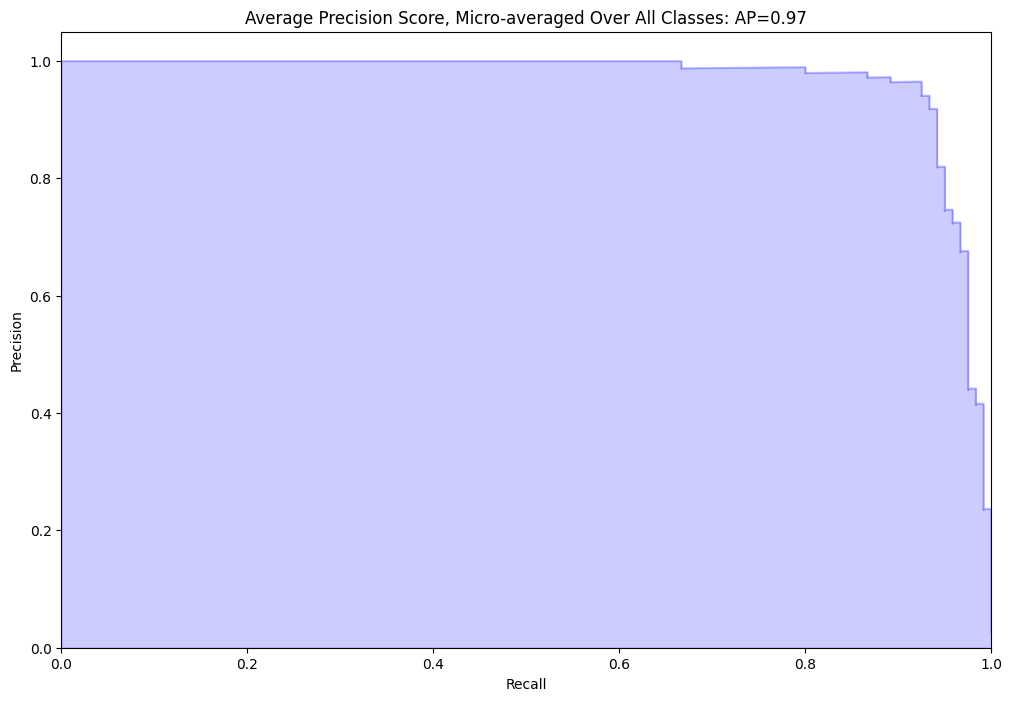

In [ ]:
import matplotlib.pyplot as plt

step_kwargs = {'step': 'post'}
plt.figure(1, figsize=(12, 8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall['micro'], precision['micro'], alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average Precision Score, Micro-averaged Over All Classes: AP={0:0.2f}'.format(average_precision['micro']))

plt.show()


With an Average Precision (AP) score of 0.97, we can conclude that the micro-averaged precision-recall curve in the graph shows an excellent classifier performance across all classes.

Interpreting the graph:
- The blue step line, which represents the precision-recall curve, is likely to show a steep rise at the beginning, indicating that the classifier achieves relatively high precision even with a low recall.
- The light blue shaded area under the curve, which represents the area under the precision-recall curve (AP), is close to 1.0. This suggests that the classifier is making precise positive predictions while maintaining a high recall across different decision thresholds.

Key points:
- The classifier is effective at identifying positive samples (high recall) while minimizing false positives (high precision).
- The overall classifier performance, as measured by the AP score, is excellent, indicating that it performs well across all classes in the multiclass problem.

In summary, the precision-recall curve and the high AP score indicate that the classifier is robust and accurate in its predictions, making it a reliable model for the multiclass classification task.